# EDA

In [17]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open("cleaned/cleaned_10_28_2023.csv","r") as f:
    df = pd.read_csv(f, converters={'routes': ast.literal_eval})

In [18]:
df.head()

,station_complex_id,borough,routes,payment_method,latitude,longitude,ridership,transfers,region,ridership_percap,transfers_percap
0,A002,Manhattan,"[5, N, R, 4, W, 6]",metrocard,40.762661,-73.967255,11868,995,NW,0.007435,0.000623
1,A002,Manhattan,"[5, N, R, 4, W, 6]",omny,40.762661,-73.967255,15570,2348,NW,0.009754,0.001471
2,A006,Manhattan,"[N, R, W]",metrocard,40.764812,-73.973351,5546,71,NW,0.003474,0.000044
3,A006,Manhattan,"[N, R, W]",omny,40.764812,-73.973351,7802,238,NW,0.004888,0.000149
4,A010,Manhattan,"[N, R, Q, W]",metrocard,40.764664,-73.980659,9293,153,NW,0.005822,0.000096


## Geo plots

In [ ]:
geo_df = df[["latitude","longitude","ridership"]].groupby(["latitude","longitude"]).sum().reset_index()

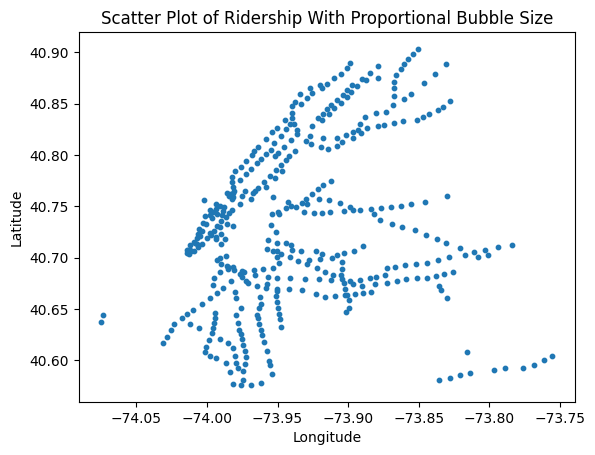

In [41]:
plt.scatter(geo_df["longitude"], geo_df["latitude"], s = 10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Subway Stations')
plt.show()

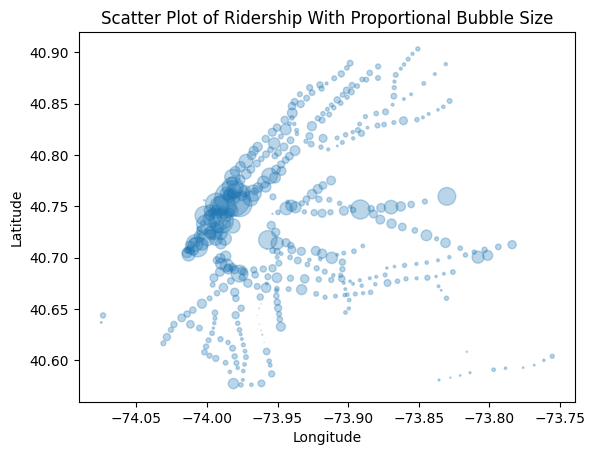

In [36]:
plt.scatter(geo_df["longitude"], geo_df["latitude"], s=geo_df["ridership"]/200, alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Subway Stations With Proportional Ridership Bubbles')
plt.show()

## Ridership by location

In [23]:
def hist_plot(cat, val):
    plt_df = df[[cat,val]].groupby(cat).sum().reset_index()
    plt.bar(plt_df[cat], plt_df[val], color='green', alpha=0.7)
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.title(f'Bar Graph of {val} by {cat}')
    plt.show()

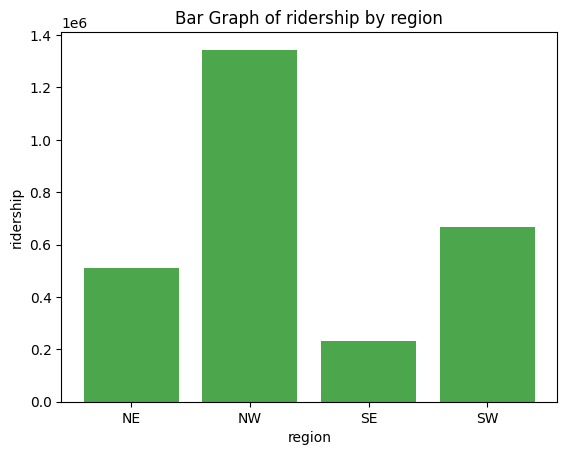

In [28]:
hist_plot("region", "ridership")